# **Data Analysis And Visualization on Co2 DataSet**

## 1. *Importing Libraries*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. *Reading The DataSet*

In [3]:
file1 = pd.read_csv('../CO2+Emissions/visualizing_global_co2_data.csv')

* ### **Data Dictionary**

In [4]:
data_dictionary = pd.read_excel('../CO2+Emissions/visualizing_global_CO2_emissions_data_dictionary.xlsx')

| <span style="color:#FF2E63">**Column**</span> | <span style="color:#FF2E63">**Description**</span> |
|---------------------------------------------|-----------------------------------------------|
| `country` | Geographic location. |
| `year` | Year of observation. |
| `iso_code` | ISO 3166-1 alpha-3, three-letter country codes. |
| `population` | Population by country and year. |
| `gdp` | Gross domestic product measured in international dollars. |
| `cement_co2` | CO2 emissions from cement production. |
| `cement_co2_per_capita` | CO2 emissions from cement production per capita. |
| `co2` | Total CO2 emissions. |
| `co2_growth_abs` | Absolute change in CO2 emissions. |
| `co2_growth_prct` | Percentage change in CO2 emissions. |
| `co2_including_luc` | Total CO2 emissions including land-use change and forestry. |
| `co2_including_luc_growth_abs` | Absolute change in total CO2 emissions including land-use change and forestry. |
| `co2_including_luc_growth_prct` | Percentage change in total CO2 emissions including land-use change and forestry. |
| `co2_including_luc_per_capita` | Total CO2 emissions including land-use change and forestry per capita. |
| `co2_including_luc_per_gdp` | Total CO2 emissions including land-use change and forestry per unit of GDP. |
| `co2_including_luc_per_unit_energy` | Total CO2 emissions including land-use change and forestry per unit of energy. |
| `co2_per_capita` | CO2 emissions per capita. |
| `co2_per_gdp` | CO2 emissions per unit of GDP. |
| `co2_per_unit_energy` | CO2 emissions per unit of energy. |
| `coal_co2` | CO2 emissions from coal combustion. |
| `coal_co2_per_capita` | CO2 emissions from coal combustion per capita. |
| `consumption_co2` | CO2 emissions from consumption. |
| `consumption_co2_per_capita` | CO2 emissions from consumption per capita. |
| `consumption_co2_per_gdp` | CO2 emissions from consumption per unit of GDP. |
| `cumulative_cement_co2` | Cumulative CO2 emissions from cement production. |
| `cumulative_co2` | Cumulative CO2 emissions. |
| `cumulative_co2_including_luc` | Cumulative CO2 emissions including land-use change and forestry. |
| `cumulative_coal_co2` | Cumulative CO2 emissions from coal combustion. |
| `cumulative_flaring_co2` | Cumulative CO2 emissions from flaring. |
| `cumulative_gas_co2` | Cumulative CO2 emissions from gas combustion. |
| `cumulative_luc_co2` | Cumulative CO2 emissions from land-use change and forestry. |
| `cumulative_oil_co2` | Cumulative CO2 emissions from oil combustion. |
| `cumulative_other_co2` | Cumulative CO2 emissions from other sources. |
| `energy_per_capita` | Energy consumption per capita. |
| `energy_per_gdp` | Energy consumption per unit of GDP. |
| `flaring_co2` | CO2 emissions from flaring. |
| `flaring_co2_per_capita` | CO2 emissions from flaring per capita. |
| `gas_co2` | CO2 emissions from gas combustion. |
| `gas_co2_per_capita` | CO2 emissions from gas combustion per capita. |
| `ghg_excluding_lucf_per_capita` | Greenhouse gas emissions excluding land-use change and forestry per capita. |
| `ghg_per_capita` | Greenhouse gas emissions per capita. |
| `land_use_change_co2` | CO2 emissions from land-use change. |
| `land_use_change_co2_per_capita` | CO2 emissions from land-use change per capita. |
| `methane` | Methane emissions. |
| `methane_per_capita` | Methane emissions per capita. |
| `nitrous_oxide` | Nitrous oxide emissions. |
| `nitrous_oxide_per_capita` | Nitrous oxide emissions per capita. |
| `oil_co2` | CO2 emissions from oil combustion. |
| `oil_co2_per_capita` | CO2 emissions from oil combustion per capita. |
| `other_co2_per_capita` | CO2 emissions from other sources per capita. |
| `other_industry_co2` | CO2 emissions from other industrial processes. |

## *Data Cleaning*

### 1. Duplicate Values

In [6]:
file1.duplicated().sum()

0

### 2. Null Values

In [7]:
file1.isna().sum()

country                            0
year                               0
iso_code                        8456
population                     10590
gdp                            36034
                               ...  
temperature_change_from_n2o    12978
total_ghg                      44449
total_ghg_excluding_lucf       44449
trade_co2                      46339
trade_co2_share                46340
Length: 79, dtype: int64

array([    0,     0,  8456, 10590, 36034, 25624, 27884, 19249, 21588,
       25566, 26380, 26681, 26475, 26902, 34897, 40876, 23683, 34307,
       40322, 25529, 26177, 45998, 46371, 46700, 25725, 21242, 26380,
       25630, 25824, 25756, 11210, 25657, 48212, 40278, 43439, 25723,
       26326, 25655, 26258, 44449, 44449, 11210, 14572, 44448, 44448,
       44448, 44448, 25556, 26231, 48212, 48212, 40207, 29768, 21242,
       26380, 25630, 29768, 21242, 26380, 25630, 34618, 28608, 11210,
       27177, 48212, 34618, 28608, 11210, 27177, 48212,  8874, 12978,
        8874,  8874, 12978, 44449, 44449, 46339, 46340])

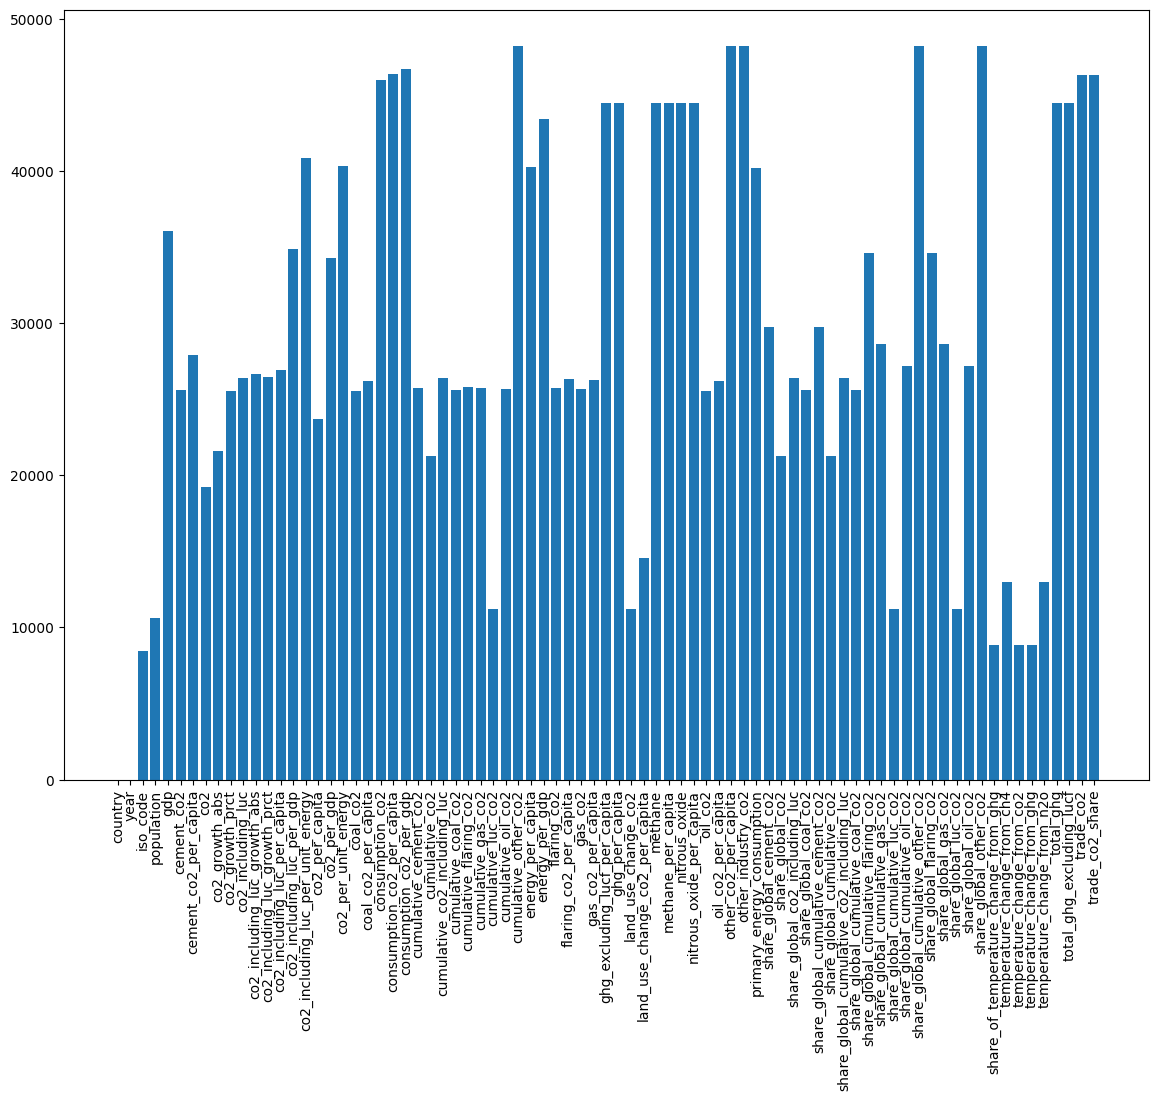

In [39]:
plt.figure(figsize=(14, 10))
plt.bar(file1.isna().sum().index, file1.isna().sum().values) # type: ignore
plt.xticks(rotation = 90)
plt.show()

In [9]:
file1.shape

(50598, 79)

In [26]:
fillnadict = {}

In [10]:
(8456/50598) * 100

16.71212300881458

In [8]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50598 entries, 0 to 50597
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50598 non-null  object 
 1   year                                       50598 non-null  int64  
 2   iso_code                                   42142 non-null  object 
 3   population                                 40008 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             29010 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

In [12]:
file1['country'].nunique()

278

In [13]:
file1['iso_code'].nunique()

232

In [24]:
from math import nan


file1[file1['iso_code'].isna()]['country'].value_counts()

country
Africa                                           272
European Union (28)                              272
Upper-middle-income countries                    272
South America                                    272
Oceania                                          272
North America (excl. USA)                        272
North America                                    272
Lower-middle-income countries                    272
Low-income countries                             272
High-income countries                            272
World                                            272
Asia                                             272
Europe (excl. EU-28)                             272
Asia (excl. China and India)                     272
Europe                                           272
Europe (excl. EU-27)                             272
European Union (27)                              230
European Union (27) (GCP)                        172
Europe (GCP)                          

In [27]:
# fillnadict['iso_code'] = 'Reg'

#### 2.1 Dividing the Dataset Into countries and other regions

In [45]:
countries = file1.dropna(subset=['iso_code'])
regions = file1[file1['iso_code'].isna()]

In [44]:
countries

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795
50596,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.112,0.001,0.001,0.002,0.0,NaN,NaN,1.006,9.481


In [46]:
regions

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
172,Africa,1750,NaN,7.627809e+07,NaN,0.000,0.000,0.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,Africa,1751,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,Africa,1752,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,Africa,1753,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,Africa,1754,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50077,World,2017,NaN,7.599822e+09,1.104307e+14,1507.923,0.198,36096.738,572.547,1.612,...,100.0,100.0,0.394,1.039,1.511,0.078,48251.879,47031.820,0.004,0.0
50078,World,2018,NaN,7.683790e+09,1.136302e+14,1569.218,0.204,36826.508,729.772,2.022,...,100.0,100.0,0.399,1.058,1.536,0.079,49368.039,47980.469,-0.004,-0.0
50079,World,2019,NaN,7.764951e+09,NaN,1617.507,0.208,37082.559,256.049,0.695,...,100.0,100.0,0.404,1.076,1.561,0.081,49758.230,48116.559,0.000,0.0
50080,World,2020,NaN,7.840953e+09,NaN,1637.537,0.209,35264.086,-1818.472,-4.904,...,100.0,100.0,0.410,1.094,1.585,0.082,NaN,NaN,0.000,0.0


#### 2.2 Data Cleaning on countries

In [49]:
countries.isna().sum()

country                            0
year                               0
iso_code                           0
population                      4925
gdp                            27594
                               ...  
temperature_change_from_n2o     7771
total_ghg                      36353
total_ghg_excluding_lucf       36353
trade_co2                      38443
trade_co2_share                38444
Length: 79, dtype: int64

In [52]:
print(f"Percentage of Population missing : {(4925/countries.shape[0]) * 100}")

Percentage of Population missing : 11.686678373119454


In [68]:
no_pop_indexes = countries[countries['population'].isna()].index

In [59]:
countries[countries['country']== 'Aland Islands'].index

Index([616, 617, 618, 619, 620, 621, 622, 623, 624, 625,
       ...
       778, 779, 780, 781, 782, 783, 784, 785, 786, 787],
      dtype='int64', length=172)

In [79]:
countries.loc[616:787, :].isna().sum()

country                          0
year                             0
iso_code                         0
population                     172
gdp                            172
                              ... 
temperature_change_from_n2o    172
total_ghg                      172
total_ghg_excluding_lucf       172
trade_co2                      172
trade_co2_share                172
Length: 79, dtype: int64

In [80]:
countries.loc[no_pop_indexes, :]

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
616,Aland Islands,1850,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,Aland Islands,1851,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,Aland Islands,1852,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,Aland Islands,1853,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620,Aland Islands,1854,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49733,Western Sahara,1945,ESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49734,Western Sahara,1946,ESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49735,Western Sahara,1947,ESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49736,Western Sahara,1948,ESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
countries.loc[no_pop_indexes, :].isna().sum().values

array([   0,    0,    0, 4925, 4925, 3396, 4925, 3284, 3293, 4710, 4403,
       4406, 4540, 4925, 4925, 4925, 4925, 4925, 4904, 4684, 4925, 4925,
       4925, 4925, 3396, 3284, 4403, 4684, 4684, 4684, 2238, 4684, 4925,
       4925, 4925, 4684, 4925, 4684, 4925, 4925, 4925, 2238, 4925, 4925,
       4925, 4925, 4925, 4684, 4925, 4925, 4925, 4854, 4481, 3284, 4403,
       4684, 4481, 3284, 4403, 4684, 4890, 4796, 2238, 4796, 4925, 4890,
       4796, 2238, 4796, 4925, 2732, 4193, 2732, 2732, 4193, 4925, 4925,
       4925, 4925])

In [94]:
nan_countries = countries.loc[no_pop_indexes, :].groupby(['country']).apply(lambda x : x.isna().sum())

/tmp/ipykernel_2054/358061953.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_countries = countries.loc[no_pop_indexes, :].groupby(['country']).apply(lambda x : x.isna().sum())


In [88]:
countries.loc[no_pop_indexes, :]['country'].value_counts().sort_index()

country
Aland Islands                      172
American Samoa                      90
Andorra                             45
Anguilla                            90
Antarctica                         171
Aruba                               90
Australia                           45
Bermuda                             89
Bonaire Sint Eustatius and Saba    100
British Virgin Islands              92
Brunei                              45
Cambodia                            45
Canada                              14
Christmas Island                   171
Cook Islands                        90
Cote d'Ivoire                       45
Curacao                            100
Falkland Islands                    90
Faroe Islands                       90
French Guiana                      180
French Polynesia                    94
Germany                              8
Greenland                           90
Guadeloupe                         180
Guernsey                           100
Guinea           

In [96]:
counts = countries.loc[no_pop_indexes, :]['country'].value_counts().sort_index()

In [95]:
may_have_impact = []
for country in nan_countries.index:
    for column in nan_countries.columns:
        country_vals = countries[countries['country'] == country]
        
        if country_vals[column]

Aland Islands
American Samoa
Andorra
Anguilla
Antarctica
Aruba
Australia
Bermuda
Bonaire Sint Eustatius and Saba
British Virgin Islands
Brunei
Cambodia
Canada
Christmas Island
Cook Islands
Cote d'Ivoire
Curacao
Falkland Islands
Faroe Islands
French Guiana
French Polynesia
Germany
Greenland
Guadeloupe
Guernsey
Guinea
Iceland
Isle of Man
Jersey
Macao
Martinique
Mauritania
Mayotte
Montserrat
Netherlands Antilles
New Caledonia
Niue
Papua New Guinea
Puerto Rico
Reunion
Saint Helena
Saint Martin (French part)
Saint Pierre and Miquelon
Sierra Leone
Singapore
Sint Maarten (Dutch part)
Svalbard and Jan Mayen
Turks and Caicos Islands
Tuvalu
United Kingdom
United States Virgin Islands
Wallis and Futuna
Western Sahara


**Most of the regions almost have **